Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below.

Rename this problem sheet as follows:

    ps{number of lab}_{your user name}_problem{number of problem sheet in this lab}
    
for example
    
    ps7_blja_problem2

Submit your homework within one week until next Thursday, December 3, 2020, 9 am.

In [1]:
NAME = "Ahmad Modabber"
EMAIL = "amod@tu-chemnitz.de"
USERNAME = "amod"

---

# Introduction to Data Science
## Lab 7: Logistic regression
### Part B: Logistic regression in practice

In this lab, we want to investigate the `Default` data set known from the lecture.
It contains the predictors
- `student` status, either `'Yes'` or `'No'`
- `balance`, i.e., monthly credit card balance
- yearly `income`
and the response
- `default`, which is either `'Yes'` or `'No'`

We first load the necessary modules.

By the way, the command
    
    plt.rcParams['figure.figsize'] = [13, 5]
    
changes the default size of figures (in inches).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 5]

**Task**: Download the file `Default.csv`.
Read it using the `pandas` function `read_csv` and store the `pandas DataFrame` in the variable `D`.
Make sure that:
- the index column is recognized appropriately.
- the column titles are correct

In [3]:
# YOUR CODE HERE
D = pd.read_csv('Default.csv', delimiter=",", decimal=',', index_col=0)

In [4]:
assert 'D' in locals()
assert isinstance(D.index, pd.Int64Index)
assert isinstance(D.columns, pd.Index)
assert D.columns[1] == 'student'
assert D.shape == (10000, 4)

**Task**: Inspect the data using the methods you've learned so far, e.g., `describe`, `hist`, `head`, etc.

In [5]:
# Task: Apply here at least two different methods to inspect the data set D

D.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [6]:
D.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [7]:
D.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


You should observe that the method `describe` only contains the predictors `balance` and `income`, but not  `default` and `student`.

This is due to the fact that these values were read in by the `read_csv` function as **strings**.
We know from the lecture that these predictors are categorical (in particular binary).

In order to process these values we convert them to the data type `boolean`, i.e., we replace the `String` objects in the columns `default` and `student` by `Boolean`'s.
There are a lot of ways to accomplish this task; the easiest might be

    D.replace(to_replace='No', value=False, inplace=True)
    
**Task**: Replace every 'No' and 'Yes' in the `DataFrame` by the values `False` and `True`, resp.

In [8]:
# YOUR CODE HERE
D.replace(to_replace='No', value=False, inplace=True)
D.replace(to_replace='Yes', value=True, inplace=True)
D.head()

,default,student,balance,income
1,False,False,729.526495,44361.625074
2,False,True,817.180407,12106.134700
3,False,False,1073.549164,31767.138947
4,False,False,529.250605,35704.493935
5,False,False,785.655883,38463.495879


In [9]:
assert D.student.dtype == 'bool'
assert D.default.dtype == 'bool'

### Answer the following questions!

Store your answers in the given variables

**Question A**: How many students belong to the data set?

In [10]:
# YOUR CODE HERE
answer_A = D.student.sum()
answer_A

2944

In [11]:
assert 'answer_A' in locals()

**Question B**: What is the mean **balance** of all samples?

In [12]:
# YOUR CODE HERE
answer_B = D.balance.mean()
answer_B

835.374885612557

In [13]:
assert 'answer_B' in locals()

**Question C**: What is the mean income of the **students**?

In [14]:
# YOUR CODE HERE
answer_C = D[D.student].income.mean()
answer_C

17950.23077508501

In [15]:
assert 'answer_C' in locals()

**Question D**: How many **students** obtain an **income** of more than 20,000.

In [16]:
# YOUR CODE HERE
answer_D = D[D.income>20000].student.sum() # OR D.student[D.income>20000].sum()
answer_D

954

In [17]:
assert 'answer_D' in locals()

**Question E**: What is the 25% quantile of the predictor **balance**?

In [18]:
# YOUR CODE HERE
answer_E =D.balance.quantile(.25)
answer_E

481.73110505451797

In [19]:
assert 'answer_E' in locals()

### Plotting the data set

Next, we want to plot both, the `income` and `balance` predictors as boxplots as a function of the `default` status.

**Task**: Complete the plotting command in the following cell. What do you observe?

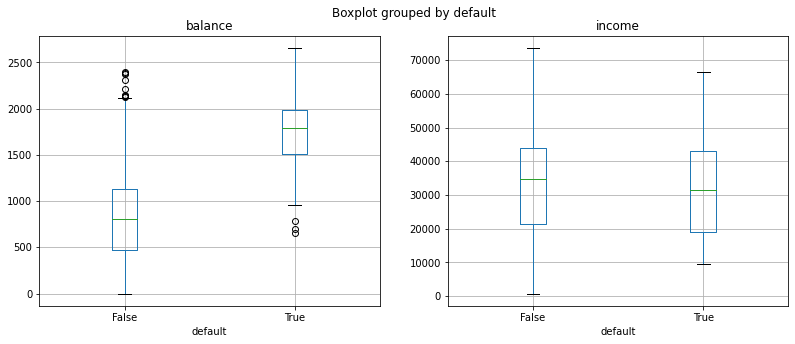

In [20]:
fig, ax = plt.subplots(1,2)
D.boxplot(column='balance',by='default', ax=ax[0]);
D.boxplot(column='income',by='default', ax=ax[1]);

#By balance we can predict about default but incomes does not predict default

You should observe that it seems that the credit card balance has a large effect on the default status, while the income seems not to predict the default status very well.

Finally, the following cell let's you plot the `default`'s vs. the non-`default`'s of the data set. No task here!

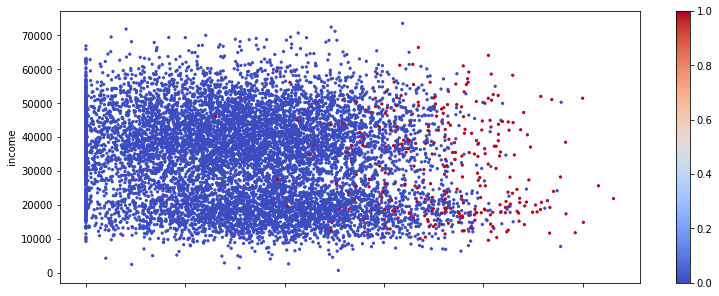

In [21]:
D.plot(y='income', x='balance', kind='scatter',c = D.default, cmap = 'coolwarm', marker='.');

### Fitting a logistic regression model
Next, we want to fit a logistic regression model to our data.
Use the `LogisticRegression` function in the module `sklearn.linear_model`.
The behaviour is similar to a `LinearRegression` fit.

You can find the documentation of this function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
There are a lot of optional arguments, the most important might be the unimpressive looking parameter `C`, which determines the strength of regularization used in the algorithm that solves the maximum likelihood problem.

We will discuss regularization later in the lecture as well as in the labs. For now, it suffices if you keep the following in mind:

**The larger you choose `C`, the less the problem will be regularized.**

**Task**: Fit a logistic regression model that predicts the probability of `default` using `balance` as predictor. You should obtain the following values: $\beta_0: -10.6513$, $\beta_\text{balance}: 0.0055$.

Choose the following optional parameters:
* set the regularization parameter `C = 1e10` (which is the scientific notation of $C = 10^{10}$, and thus very large)
* set the error tolerance to `tol=1e-10`
* set the solver to `solver = 'liblinear'`

in this and the upcoming problems.

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C = 1e10, tol=1e-10, solver = 'liblinear')

x = D['balance'].values.reshape(-1, 1)
y = D['default']


clf = model.fit(x,y)

print(f'intercept: {clf.intercept_[0]} , coef: {clf.coef_[0,0]}')

intercept: -10.65130041642195 , coef: 0.0054988988330032865


**Task**: Store the intercept of the model in a variable `intercept0` and the regression coefficient in the variable `reg_coef0`.
These quantities represent the coeffcients for a linear regression model predicting the log-odds, i.e.

$$
\log \left( \frac{p(x)}{1-p(x)} \right) = \beta_0 + \beta_1 \, x
$$

In [23]:
# YOUR CODE HERE
intercept0 = clf.intercept_[0]
reg_coef0 = clf.coef_[0,0]

In [24]:
assert 'intercept0' in locals()
assert 'reg_coef0' in locals()

**Task**:
Predict the probability of `default` for a `balance` value of $\$$1,000 and $\$$2,000 and store your answers is the variables `pod_1000` and `pod_2000`, resp.

Use the method `predict_proba` of a `LogisticRegression` model.

**Note**: The model assumes that your data has the same format as your original training data. Therefore, you might have to reshape the input into the correct format.

In [25]:
# YOUR CODE HERE

values = np.array([1000, 2000]).reshape(-1,1) 
pods = clf.predict_proba(values)

pod_1000 , pod_2000 =pods[:,1]
pod_1000, pod_2000

(0.0057522142841561, 0.5857679141468288)

In [26]:
assert 'pod_1000' in locals()
assert 'pod_2000' in locals()

You should observe, that the probality of default of an individual with a credit card balance of $\$$1,000 is approximately 0.57\%.
The probality of default of an individual with a credit card balance of $\$$2,000 is approximately 58.6\%.

Now, we want to incorporate the predictors `income` and `student` status as well. This can be done easily using the same methods.

Execute the following code cell to train a new logistic regression model.

In [27]:
lr2= LogisticRegression(solver='liblinear', tol=1e-10, C=1e10)
X = D.loc[:,['balance','income','student']]
y = D.loc[:,'default']
reg2 = lr2.fit(X,y)

**Task**: Store the intercept of the new model in the variable `intercept_full` as well as the coefficients in variables `beta_balance`, `beta_income`, `beta_student`, resp.

In [28]:
# YOUR CODE HERE
intercept_full = lr2.intercept_[0]

beta_balance, beta_income, beta_student = lr2.coef_[0]

intercept_full, beta_balance, beta_income, beta_student

(-10.869045163798829,
 0.0057365052434357345,
 3.033449778394735e-06,
 -0.6467758110968794)

In [29]:
assert 'intercept_full' in locals()
assert 'beta_balance' in locals()
assert 'beta_income' in locals()
assert 'beta_student' in locals()

**Task**:
What is the default probability of a student and a non-student with a credit card balance of $\$$1,500, an income of $\$$40,000?
Store your answers in the variables `pod_student` and `pod_nonStudent`, resp.

In [30]:
# YOUR CODE HERE
value = np.array([
    [1500, 40000,True],
    [1500, 40000,False]
])
pod_student, pod_nonStudent = lr2.predict_proba(value)[:,1]
pod_student, pod_nonStudent

(0.05788194318354586, 0.10499192411977612)

In [31]:
assert 'pod_student' in locals()
assert 'pod_nonStudent' in locals()

You should observe that a student with a credit card balance of $\$$1,500 and an income of $\$$40,000 has an estimated probability of default of 5.8\%, while an non-student with the same balance and income has a probability of default of 10.5\%.